# KerasによるMNIST機械学習チュートリアル(Beginners)

In [1]:
import keras

Using TensorFlow backend.


## モジュールのインポート

In [2]:
# coding=utf8
import numpy as np
np.random.seed(98) # シード値の保持

from keras.models import Sequential
from keras.layers import Dense

## モデルの構築

In [3]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## モデルの可視化

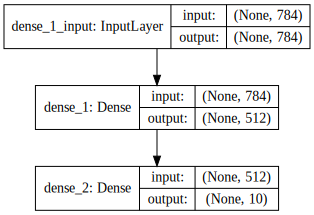

In [5]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# モデルの可視化
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## モデルのコンパイル

In [6]:
from keras.optimizers import SGD # 最適化手法(確率的勾配降下法)

# モデルのコンパイル
model.compile(loss="categorical_crossentropy", # 誤差(損失)関数
             optimizer="sgd", # 最適化手法
             metrics=['accuracy'] # 評価指標
             )

## モデルの保存とパラメータの保存

In [7]:
# JSON形式でモデルを保存
json_string = model.to_json()
open('./keras_mlp.json', 'w').write(json_string)

1081

In [8]:
#　初期ウエイトの保存
model.save_weights('./mnist_mlp_init_weight.hdf5', overwrite=True)

## モデルの読み出しとパラメータの呼び出し

In [9]:
#from keras.models import model_from_json, model_from_yaml

In [10]:
# JSON形式で保存されたモデルの呼び出し
#json_string = open('./keras_mlp.json', 'r').read()
#model = model_from_json(json_string)

In [11]:
#model.load_weights('./mnist_mlp_init_weight.hdf5')

## MNISTデータの読み込み

In [12]:
# MNISTの手書き文字データのインポート
from keras.datasets import mnist

In [13]:
#  Xは画像データ，yは画像データのラベル(0から9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.shape # 60000枚の画像データが28 * 28 ピクセルで準備されている

(60000, 28, 28)

In [15]:
y_train.shape # 60000個のラベルデータ

(60000,)

## MNISTデータの可視化

In [16]:
# 可視化用ライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt

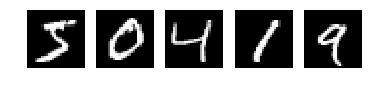

In [17]:
# 入力データを可視化（最初の５文字）
fig, ax = plt.subplots(1, 5)

for ii in range(5):
    ax[ii].imshow(X_train[ii], cmap='gray')
    ax[ii].axis('off')

## データの前処理

In [18]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [19]:
from keras.utils import np_utils

In [20]:
nb_classes = 10 # 正解のパターン数

In [21]:
# クラスベクトルをバイナリクラスの行列に変換する
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## 学習
+ tensorboard --logdir=/tmp/keras_mlp
+ http://0.0.0.0:6006

In [22]:
# TensorBoardで学習の進捗状況をみる
tb_cb = keras.callbacks.TensorBoard(log_dir='/tmp/keras_mlp', histogram_freq=1)

# バリデーションロスが下がれば、エポックごとにモデルを保存
cp_cb = keras.callbacks.ModelCheckpoint(filepath='./mnist_mlp_best_weight.hdf5', 
                                        monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# バリデーションロスが５エポック連続で上がったら、ランを打ち切る
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

cbks = [tb_cb, cp_cb, es_cb]

In [23]:
import time

In [24]:
tic = time.time()

# 学習を実行
# 学習途中の損失関数の値などはhistory.historyに保存される。
history = model.fit(X_train, Y_train,
                    batch_size=128,  # 128個ランダムに得る
                    nb_epoch=20, # 試行回数
                    verbose=0,
                    validation_data=(X_test, Y_test),
                    callbacks=cbks)

toc = time.time()

# 学習にかかった時間を表示
print("Execution time: {0:.2f} [sec]".format(toc - tic))

/Users/Kakutofu/.pyenv/versions/anaconda3-4.3.1/envs/keras/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
Epoch 00000: val_loss improved from inf to 0.60086, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00001: val_loss improved from 0.60086 to 0.43473, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00002: val_loss improved from 0.43473 to 0.37344, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00003: val_loss improved from 0.37344 to 0.34056, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00004: val_loss improved from 0.34056 to 0.31881, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00005: val_loss improved from 0.31881 to 0.30195, saving model to ./mnist_mlp_best_weight.hdf5
Epoch 00006: val_loss improved from 0.30195 to

## ベストパラメータの呼び出し

In [25]:
model.load_weights('./mnist_mlp_best_weight.hdf5')

## 学習結果の評価

In [26]:
# テストデータに対する評価値
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0]) # 損失関数の値
print('Test accuracy:', score[1]) # 精度(94%弱)

Test score: 0.206256347194
Test accuracy: 0.9417


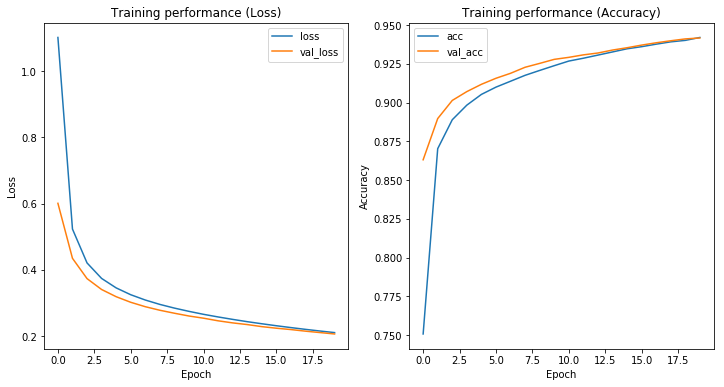

In [27]:
# 学習曲線
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

## 予測の可視化

In [28]:
# 予測値
Y_test_pred = model.predict(X_test)

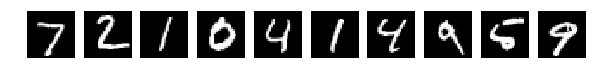

In [29]:
# テストデータの可視化
fig, ax = plt.subplots(1, 10, figsize=(10, 2))

for ii in range(10):
    ax[ii].imshow(X_test[ii].reshape(28, 28), cmap='gray') #iiの値+nでn番目以降のテストデータを出力する．
    ax[ii].axis('off')

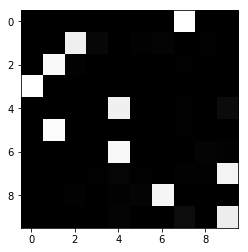

In [30]:
# 予測の可視化
plt.imshow(Y_test_pred[:10], cmap='gray', interpolation='nearest', vmin=0, vmax=1) #Y_test_predの範囲を帰ることで予測の場所を変更できる